In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import openpyxl
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
elsie = pd.read_excel(interim_dir+ 'ELSIE_030222.xlsx')

In [4]:
elsie = elsie[elsie['final_TTC_category'] == 'Cramer_class_applicable']

In [5]:
ids = elsie.DTXSID.tolist()

In [6]:
toxval = pd.read_csv('/home/grace/Documents/python/genra_mongo/notebooks/all_toxval.csv')

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,9,12,14,17,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
toxval = toxval[toxval['dsstox_sid'].isin(ids)]

In [8]:
toxval = toxval[toxval['toxval_type'] == 'NOAEL']

In [9]:
toxval.dsstox_sid.nunique()

143

In [10]:
toxval

,Unnamed: 0,dsstox_sid,chemical_casrn,preferred_name,toxval_type,toxval_subtype,toxval_type_category,toxval_type_supercategory,exposure_route,exposure_method,...,species_common,species_supercategory,strain,sex,media,critical_effect,source,subsource,year,study_duration_days
73970,13344,DTXSID1020439,120-83-2,"2,4-Dichlorophenol",NOAEL,-,NOAEL,Point of Departure,oral,drinking water,...,rat,mammals,SD,M/F,-,reduced delayed hypersensitivity response,Chiu,IRIS,1988,180.0
73993,13367,DTXSID5020607,117-81-7,Di(2-ethylhexyl) phthalate,NOAEL,-,NOAEL,Point of Departure,oral,diet,...,rat,mammals,F344,M,-,testicular toxicity,Chiu,ATSDR,2002,728.0
74015,13389,DTXSID6024200,108-39-4,m-Cresol,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,rat,mammals,SD,M/F,-,reduced body weight,Chiu,IRIS,1990,90.0
74016,13390,DTXSID6024200,108-39-4,m-Cresol,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,rat,mammals,SD,M/F,-,neurotoxicity,Chiu,IRIS,1990,90.0
74049,13423,DTXSID5020029,107-13-1,Acrylonitrile,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,mouse,mammals,CD-1,M,-,"testicular effects: reduced sperm counts, semi...",Chiu,HEAST,1993,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178265,59789,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,rat,mammals,F344,-,-,necrosis|body weight|mortality|hyperkeratosis|...,ToxRefDB,EPA ORD,1990,91.0
178266,59790,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,mouse,mammals,B6C3F1,-,-,mortality|body weight|degeneration,ToxRefDB,EPA ORD,1990,91.0
178267,59791,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,mouse,mammals,B6C3F1,-,-,hyperplasia,ToxRefDB,EPA ORD,1990,2.0
178268,59792,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,-,NOAEL,Point of Departure,oral,gavage,...,rat,mammals,F344,-,-,leukemia mononuclear|papilloma|mortality|adeno...,ToxRefDB,EPA ORD,1990,2.0


In [11]:
toxval = toxval[['dsstox_sid', 'chemical_casrn', 'preferred_name',
       'toxval_type',  'toxval_numeric_qualifier','study_duration_days' ,'pod', 'dose_units',
       'risk_assessment_class', 'study_type', 'study_duration_class',
       'study_duration_value', 'study_duration_units', 'species_common',
       'species_supercategory', 'strain', 'sex', 'media', 'critical_effect','toxval_subtype', 'toxval_type_category',
       'toxval_type_supercategory', 'exposure_route', 'exposure_method',
       'exposure_form',
       'source', 'subsource', 'year']]

In [12]:
toxval

,dsstox_sid,chemical_casrn,preferred_name,toxval_type,toxval_numeric_qualifier,study_duration_days,pod,dose_units,risk_assessment_class,study_type,...,critical_effect,toxval_subtype,toxval_type_category,toxval_type_supercategory,exposure_route,exposure_method,exposure_form,source,subsource,year
73970,DTXSID1020439,120-83-2,"2,4-Dichlorophenol",NOAEL,=,180.0,0.3,mg/kg-day,chronic,chronic,...,reduced delayed hypersensitivity response,-,NOAEL,Point of Departure,oral,drinking water,-,Chiu,IRIS,1988
73993,DTXSID5020607,117-81-7,Di(2-ethylhexyl) phthalate,NOAEL,=,728.0,5.8,mg/kg-day,chronic,chronic,...,testicular toxicity,-,NOAEL,Point of Departure,oral,diet,-,Chiu,ATSDR,2002
74015,DTXSID6024200,108-39-4,m-Cresol,NOAEL,=,90.0,50.0,mg/kg-day,chronic,chronic,...,reduced body weight,-,NOAEL,Point of Departure,oral,gavage,-,Chiu,IRIS,1990
74016,DTXSID6024200,108-39-4,m-Cresol,NOAEL,=,90.0,50.0,mg/kg-day,chronic,chronic,...,neurotoxicity,-,NOAEL,Point of Departure,oral,gavage,-,Chiu,IRIS,1990
74049,DTXSID5020029,107-13-1,Acrylonitrile,NOAEL,=,60.0,1.0,mg/kg-day,chronic,chronic,...,"testicular effects: reduced sperm counts, semi...",-,NOAEL,Point of Departure,oral,gavage,-,Chiu,HEAST,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178265,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,>=,91.0,800.0,mg/kg-day,subchronic,subchronic,...,necrosis|body weight|mortality|hyperkeratosis|...,-,NOAEL,Point of Departure,oral,gavage,-,ToxRefDB,EPA ORD,1990
178266,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,>=,91.0,1200.0,mg/kg-day,subchronic,subchronic,...,mortality|body weight|degeneration,-,NOAEL,Point of Departure,oral,gavage,-,ToxRefDB,EPA ORD,1990
178267,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,>=,2.0,400.0,mg/kg-day,chronic,chronic,...,hyperplasia,-,NOAEL,Point of Departure,oral,gavage,-,ToxRefDB,EPA ORD,1990
178268,DTXSID8039241,100-52-7,Benzaldehyde,NOAEL,>=,2.0,400.0,mg/kg-day,chronic,chronic,...,leukemia mononuclear|papilloma|mortality|adeno...,-,NOAEL,Point of Departure,oral,gavage,-,ToxRefDB,EPA ORD,1990


In [13]:
toxval.risk_assessment_class.value_counts()

developmental                   540
reproduction                    483
repeat dose                     414
subchronic                      285
chronic                         152
short-term                      141
reproduction developmental      122
carcinogenicity                  82
subacute                         56
neurotoxicity                    42
developmental neurotoxicity       7
repeat dose, carcinogenicity      3
immunotoxicity                    2
acute                             1
chronic neurotoxicity             1
Name: risk_assessment_class, dtype: int64

In [14]:
toxval = toxval.set_index('dsstox_sid')

In [15]:
toxval['pod'] = toxval['pod'].astype(float)

In [16]:
pod_adj = []
for i, row in toxval.iterrows():
    if row['risk_assessment_class'] == 'subacute':
        pod_adj.append(row['pod']/6)
    elif row['risk_assessment_class'] == 'repeat dose':
        pod_adj.append(row['pod']/6)
    elif row['risk_assessment_class'] == 'short-term':
        pod_adj.append(row['pod']/6)
    elif row['risk_assessment_class'] == 'subchronic':
        pod_adj.append(row['pod']/2)
    else:
        pod_adj.append(row['pod'])

In [17]:
toxval.shape

(2331, 27)

In [18]:
len(pod_adj)

2331

In [19]:
toxval['pod_adj'] = pod_adj

In [20]:
toxval[['study_duration_days', 'pod', 'dose_units',
       'risk_assessment_class', 'pod_adj']].to_csv(interim_dir+'chk.csv')

In [21]:
df = toxval.groupby(toxval.index).agg({'pod_adj': ['min', 'max', 'median']}).reset_index()

In [22]:
df

dsstox_sid     pod_adj                          
                           min          max       median
0    DTXSID0020498   52.166667  1500.000000   250.000000
1    DTXSID0020606   33.333333  1875.000000   170.000000
2    DTXSID0021961    3.333333   200.000000    15.000000
3    DTXSID0026044  110.000000   110.000000   110.000000
4    DTXSID0026701   83.333333  1000.000000   127.166667
..             ...         ...          ...          ...
138  DTXSID9027730  500.000000   500.000000   500.000000
139  DTXSID9034941    3.333333   166.666667    50.000000
140  DTXSID9044748   50.000000   900.000000   150.000000
141  DTXSID9047172   50.000000  3000.000000  1000.000000
142  DTXSID9052006   16.666667   500.000000   200.000000

[143 rows x 4 columns]

In [23]:
df.columns = df.columns.droplevel(0)

In [24]:
df.columns = ['dtxsid', 'min', 'max', 'median']

In [25]:
df['logNOAEL'] = np.log10(df['min'])

In [26]:
df

,dtxsid,min,max,median,logNOAEL
0,DTXSID0020498,52.166667,1500.000000,250.000000,1.717393
1,DTXSID0020606,33.333333,1875.000000,170.000000,1.522879
2,DTXSID0021961,3.333333,200.000000,15.000000,0.522879
3,DTXSID0026044,110.000000,110.000000,110.000000,2.041393
4,DTXSID0026701,83.333333,1000.000000,127.166667,1.920819
...,...,...,...,...,...
138,DTXSID9027730,500.000000,500.000000,500.000000,2.698970
139,DTXSID9034941,3.333333,166.666667,50.000000,0.522879
140,DTXSID9044748,50.000000,900.000000,150.000000,1.698970
141,DTXSID9047172,50.000000,3000.000000,1000.000000,1.698970


In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [28]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size = len(data)), 5)

In [29]:
def draw_bs_reps(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

Text(0.5, 0, 'logNOAEL')

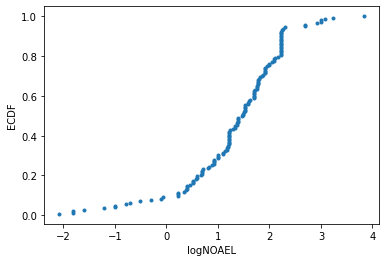

In [30]:
x, y = ecdf(df['logNOAEL'])
plt.plot(x, y, linestyle = 'None', marker = '.')
plt.ylabel('ECDF')
plt.xlabel('logNOAEL')

In [58]:
10**(np.percentile(df['logNOAEL'], 5))

0.16973322935783736

Taking the 5th percentile and adjusting to ug per person (X60/100)X1000

In [61]:
((0.16973322935783736*60)/100)*1000

101.83993761470241

In [63]:
np.percentile(df['logNOAEL'], 5)

-0.7702331257788811

In [70]:
np.percentile(df['logNOAEL'], 5) - cramer3

0.05366687422111882

In [64]:
bs_replicates = draw_bs_reps(df['logNOAEL'], np.percentile, size = 1000)

In [65]:
median_thresh = ( (10**np.median(bs_replicates))/100)*1000
conf_int = ((10**np.percentile(bs_replicates, [2.5,97.5]))/100)*1000
print('95% confidence interval = ', conf_int)
print('median = ', median_thresh)

95% confidence interval =  [ 0.25       16.66666667]
median =  1.6973322935783737


In [66]:
conf_int

array([ 0.25      , 16.66666667])

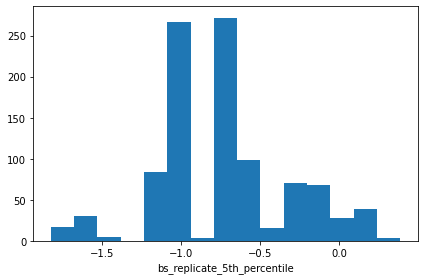

In [67]:
plt.hist(bs_replicates, bins = 15)
plt.xlabel('bs_replicate_5th_percentile')
plt.tight_layout()


#### Munro's Cramer III 5th percentile os 0.15 mg/kg bw/day. Is that the same as what we had determined
#### We could convert that into log10 form and compare that to our dataset to understand whether there is a real difference between the 2 5th percentile values in practice. This would be akin to a 1-sided bootstrap test.

null hypothesis is that the 2 5th percentiles are the same


In [68]:
cramer3 = round(np.log10(0.15), 4)

In [69]:
cramer3

-0.8239

In [71]:
toxval_shifted = df['logNOAEL'] - np.percentile(df['logNOAEL'], 5) + cramer3

In [72]:
def diff_from_cramer(data, cramer = cramer3):
    return np.percentile(data, 5) - cramer

In [73]:
diff_obs = diff_from_cramer(df['logNOAEL'] )

In [74]:
diff_obs

0.05366687422111882

In [75]:
def bootstrap_replicate_1d_v2(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [76]:
def draw_bs_reps_v2(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d_v2(data, func)

    return bs_replicates


In [77]:
bs_replicates2 = draw_bs_reps_v2(toxval_shifted, diff_from_cramer, size = 1000)

In [78]:
np.sum(bs_replicates2 >= diff_obs)/1000

0.438

(array([ 22.,  27.,  87., 250., 176., 217.,  80.,  68.,  24.,  49.]),
 array([-1.05367562, -0.83128821, -0.60890081, -0.38651341, -0.164126  ,
         0.0582614 ,  0.2806488 ,  0.50303621,  0.72542361,  0.94781101,
         1.17019841]),
 <BarContainer object of 10 artists>)

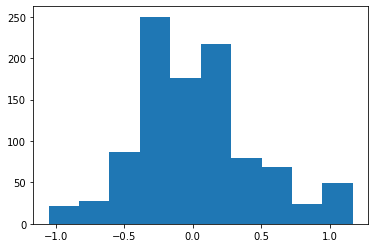

In [79]:
plt.hist(bs_replicates2)